In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import MultipleLocator

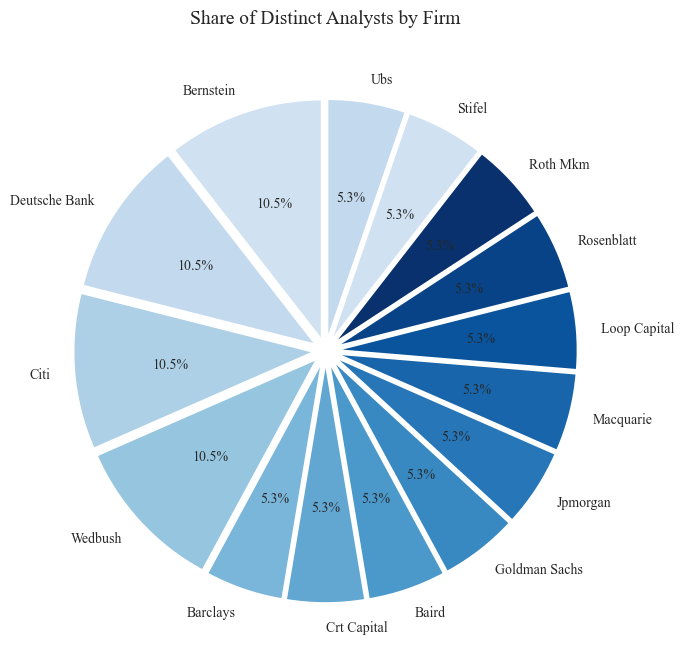

In [11]:
df = pd.read_csv("anachart/allUpgradesSheet1.csv")
df = df.dropna(subset=["Analyst"])

analysts_per_firm = (
    df.groupby("Broker")["Analyst"]
      .nunique()
      .sort_values(ascending=False)
)

blue_colors = plt.cm.Blues(range(50, 256, int(256/len(analysts_per_firm))))


plt.figure(figsize=(7,7))
explode = [0.05] * len(analysts_per_firm)

plt.pie(
    analysts_per_firm,
    labels=analysts_per_firm.index,
    autopct="%1.1f%%",
    startangle=90,
    colors=blue_colors,
    explode=explode,
    wedgeprops={"edgecolor": "white", "linewidth":1.2},
    textprops={"fontname": "Times New Roman", "fontsize": 10}
)

plt.title(
    "Share of Distinct Analysts by Firm",
    pad=20,
    fontname="Times New Roman",
    fontsize=14
)

plt.tight_layout()
plt.show()


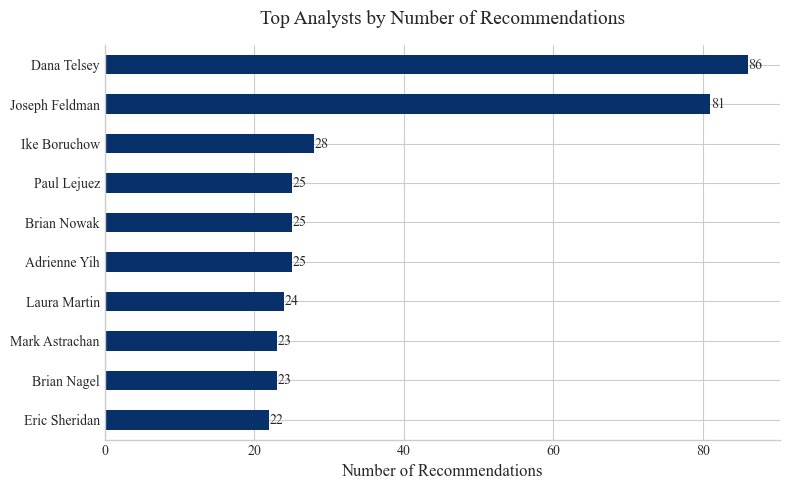

In [12]:
df1 = pd.read_csv("anachart/All Companies - no changes_downgrades_upgrades - Sheet1.csv")
df1 = df1.dropna(subset=["Analyst"])  # ✅ drop rows missing Analyst

analyst_counts = df1["Analyst"].value_counts()
top_analysts = analyst_counts.head(10)

plt.style.use("seaborn-v0_8-whitegrid")
plt.figure(figsize=(8,5))

ax = top_analysts.sort_values().plot(
    kind="barh",
    color="#08306B"  
)

ax.set_title(
    "Top Analysts by Number of Recommendations", 
    pad=15, 
    fontname="Times New Roman", 
    fontsize=14
)
ax.set_xlabel(
    "Number of Recommendations", 
    fontname="Times New Roman", 
    fontsize=12
)
ax.set_ylabel("", fontname="Times New Roman")

for label in ax.get_xticklabels():
    label.set_fontname("Times New Roman")
    label.set_fontsize(10)

for label in ax.get_yticklabels():
    label.set_fontname("Times New Roman")
    label.set_fontsize(10)

ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

for i, v in enumerate(top_analysts.sort_values()):
    ax.text(v + 0.1, i, str(v), va="center", fontname="Times New Roman", fontsize=10)

plt.tight_layout()
plt.show()


In [13]:
df2 = pd.read_csv("anachart/All Companies - no changes_downgrades_upgrades - Sheet1.csv")

def normalize_rating(r):
    r = str(r).lower()
    if any(x in r for x in ["buy", "overweight", "outperform"]):
        return "Buy"
    elif any(x in r for x in ["sell", "underperform"]):
        return "Sell"
    else:
        return "Hold"

df2["Rating Before Norm"] = df2["Rating Before"].apply(normalize_rating)
df2["Rating After Norm"] = df2["Rating After"].apply(normalize_rating)


In [14]:
grouped = (
    df2.groupby(
        ["Event Type", "Rating Before Norm", "Rating After Norm"]
    )
    .size()
    .reset_index(name="count")
)

df2["Event Type"] = (df2["Event Type"].str.strip().str.title())

grouped.head()

,Event Type,Rating Before Norm,Rating After Norm,count
0,Downgrade,Buy,Hold,33
1,Downgrade,Hold,Hold,1
2,Downgrade,Hold,Sell,4
3,No change,Buy,Buy,875
4,No change,Buy,Hold,6


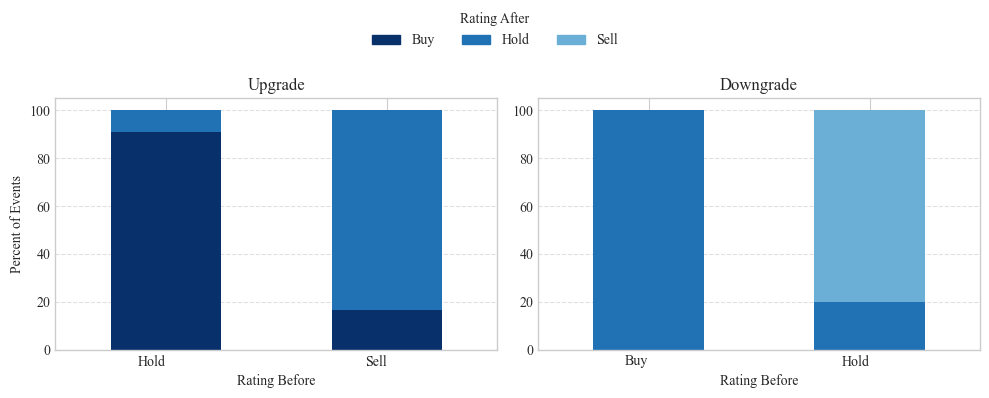

In [15]:
plt.rcParams["font.family"] = "Times New Roman"
colors = {
    "Buy": "#08306B",
    "Hold": "#2171B5",
    "Sell": "#6BAED6"
}

fig, axes = plt.subplots(1, 2, figsize=(10,4), sharey=False)

for ax, event in zip(axes, ["Upgrade", "Downgrade"]):

    subset = df2[df2["Event Type"] == event]

    pivot = (
        subset
        .groupby(["Rating Before Norm", "Rating After Norm"])
        .size()
        .unstack(fill_value=0)
        .reindex(columns=["Buy", "Hold", "Sell"], fill_value=0)
    )


    pivot_pct = pivot.div(pivot.sum(axis=1), axis=0) * 100

    pivot_pct.plot(
        kind="bar",
        stacked=True,
        ax=ax,
        color=[colors[c] for c in pivot_pct.columns],
        legend=False
    )

    ax.set_title(event)
    ax.set_xlabel("Rating Before")
    ax.set_ylabel("Percent of Events" if event=="Upgrade" else "")  # only first y-label

    ax.set_axisbelow(True)
    ax.yaxis.grid(True, linestyle="--", alpha=0.6)

    ax.set_xticklabels(ax.get_xticklabels(), rotation=0, ha='right')

handles = [plt.Rectangle((0,0),1,1,color=colors[c]) for c in ["Buy", "Hold", "Sell"]]
labels = ["Buy", "Hold", "Sell"]
fig.legend(handles, labels, title="Rating After", loc="upper center", ncol=3)

plt.tight_layout(rect=[0,0,1,0.85])
plt.show()


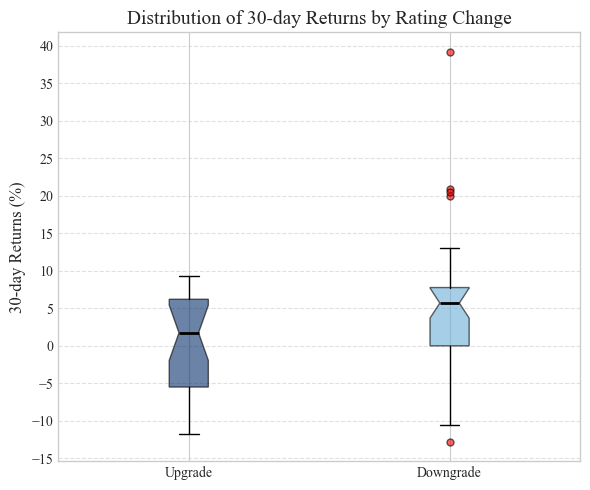

In [16]:
df = pd.read_csv("t_test_30_percent - Sheet1.csv") 

upgrade_returns = df["Upgrade: 30-day returns"].dropna()
downgrade_returns = df["Downgrade: 30-day returns"].dropna()

data = [upgrade_returns, downgrade_returns]

fig, ax = plt.subplots(figsize=(6,5))

bp = ax.boxplot(
    data,
    tick_labels=["Upgrade", "Downgrade"],  # <-- use tick_labels instead of labels
    patch_artist=True,
    notch=True,
    medianprops=dict(color="black", linewidth=2),
    boxprops=dict(facecolor="#08306B", alpha=0.6),  # Upgrade blue
    whiskerprops=dict(color="black", linewidth=1),
    capprops=dict(color="black", linewidth=1),
    flierprops=dict(marker="o", markerfacecolor="red", markersize=5, alpha=0.6)
)

# Color second box differently (Downgrade)
bp['boxes'][1].set_facecolor("#6BAED6")  # orange
bp['boxes'][1].set_alpha(0.6)

# Titles and labels
ax.set_ylabel("30-day Returns (%)", fontname="Times New Roman", fontsize=12)
ax.set_title("Distribution of 30-day Returns by Rating Change", fontname="Times New Roman", fontsize=14)

# Tick labels font
for label in ax.get_xticklabels() + ax.get_yticklabels():
    label.set_fontname("Times New Roman")
    label.set_fontsize(10)

# Y-axis grid
ax.yaxis.grid(True, linestyle="--", alpha=0.6)
ax.set_axisbelow(True)

# Y-axis ticks every 5%
ax.yaxis.set_major_locator(MultipleLocator(5))

plt.tight_layout()
plt.show()
